umin:  0.5989658724588716 tE:  176 skew:  0.4913687226443161 std:  0.2566290876240651
umin:  0.37046630515016 tE:  180 skew:  -0.7199912598456539 std:  0.32766517762875313
umin:  0.5202140881660591 tE:  181 skew:  0.6831756652158548 std:  0.29776086846604877
verlorene ML:  2
scheinbare ML:  0
gefundene ML:  1
[1. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


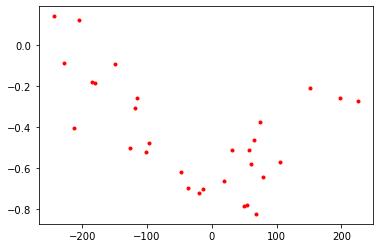

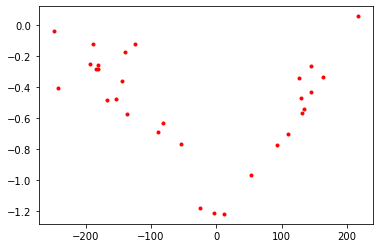

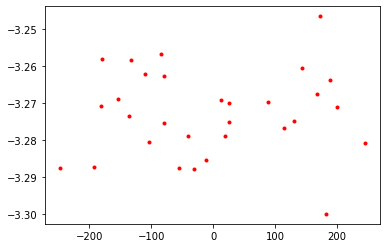

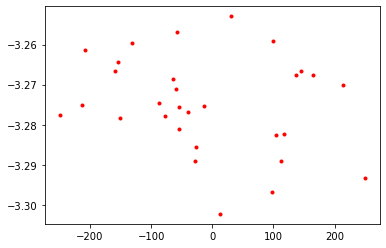

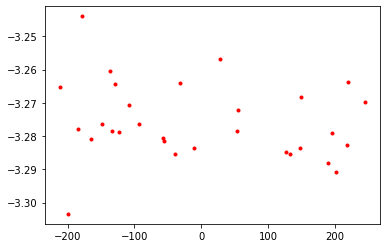

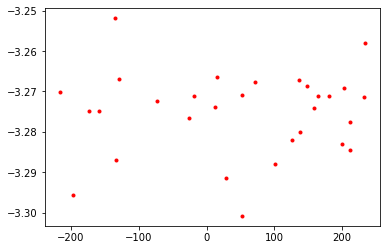

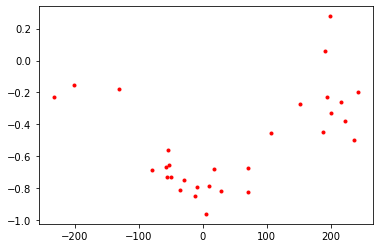

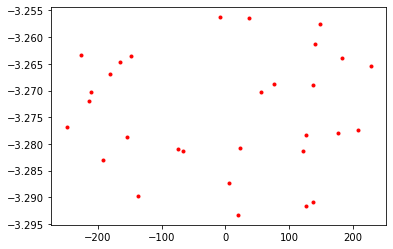

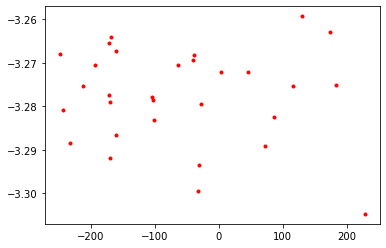

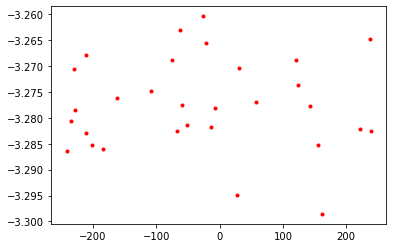

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm, skew, kurtosis
from scipy.optimize import curve_fit as fit
import random
import numbers

LCamount = 10
#LISTS
truthlst = np.zeros(LCamount) #Liste gefilterter ML-Events, np.zeros(x) macht Liste mit x Nullen
truetruth_lst = np.zeros(LCamount) #Liste mit tatsächlichen ML-Events
filternumber = 2
probability = 2
magpointamount = 30
lclist = np.zeros(LCamount) #stellt synthetischen Datensatz dar
skewlist = np.zeros(LCamount) #Skewness-Werte alles LC
stdlist = np.zeros(LCamount) #Standardabw-Werte alles LC
filterlst = np.zeros(LCamount) #Index (wie object ID) wird in Liste eingefügt -> am Schluss gezählt, ob alle Kriterien erfüllt
#Theorie-Parameter:
t0=0 #Zeitpunkt max. Helligkeit
surveylength = 500 #wie lange gesamte Messung dauerte = maximale Eventdauer
standard_deviation = 0.2
mean_skew = -0.22994225279524635  #Mittelwert von 2 fields 
mean_std = 0.15856555  #Mittelwert von 2 fields 
mean_mean = 20.421268  #Mittelwert von 2 fields 
C = 0

for i in range(0, LCamount): #random Lichtkurven werden generiert
    #Produktion von künstlichen Lichtkurven
    l = random.randint(0, 5) #Helligkeit Stern
    p = random.randint(0, probability) #Wahrscheinlichkeit von 1/40

    if p == 1:
        truetruth_lst[i] = 1 #Nullen-Array an x-ter Stelle mit 1 ersetzt -> ML-Event
        # t0=0 #Zeitpunkt max. Helligkeit
        # umin=0.25
        # tE=25 #Zeitdauer, um Einstein-Radius zurückzulegen
        # standard_deviation = 0.2

        t = [] #(start, end, Anz. Striche zwischen start und end) -> x-Achse
        #freie Parameter hängen von t ab -> verändern sich mit der Zeit -> Körper bewegen sich
        a = []
        umin = random.random()
        tE = random.randint(0, (1/2)*surveylength) #Zeitdauer, um Einstein-Radius zurückzulegen
        #random.uniform() gives random float between given range
        for i in range(magpointamount):
            t.append(random.randint(-(1/2)*surveylength, (1/2)*surveylength))
            t.sort()
        for d in t:  #Helligkeit A abhängig von u, u abhängig t
            u = np.sqrt(umin**2 + ((d-t0)/tE)**2)
            A = (u**2 + 2) / (u*np.sqrt(u**2 + 4)) + random.gauss(0, standard_deviation) #bei beiden Gauss-Rauschen machen
            M = -2.5*np.log10(A) - C
            a.append(M)
        lclist.append(a)
        print("umin: ", umin, "tE: ", tE, "skew: ", skew(a), "std: ", np.std(a))

        plt.figure() #make coordinate system
        plt.plot(t, a,".", color = "red")#t,a = lists! -> A(t)+0.2*random -> adds random number to whole list -> for loop to handle each value separately!

    if p != 1: 
        
        t = [] #(start, end, Anz. Striche zwischen start und end) -> x-Achse
        #freie Parameter hängen von t ab -> verändern sich mit der Zeit -> Körper bewegen sich
        a = []
        for i in range(magpointamount):
            t.append(random.randint(-(1/2)*surveylength, (1/2)*surveylength))
            t.sort()
        for d in t:
            A = mean_mean + random.gauss(0, standard_deviation)
            M = -2.5*np.log10(A) - C
            a.append(M)
        lclist.append(a)
        plt.figure() #make coordinate system
        plt.plot(t, a,".", color = "red")#t,a = lists! -> A(t)+0.2*random -> adds random number to whole list -> for loop to handle each value separately!

for i in range(LCamount):
    skewlist.append(skew(lc[i]))
    stdlist.append(np.std(lc[i]))

    
for i in range(LCamount):
    if i < mean_skew : #Minus weil sonst zu streng, lieber zu viel erkannt als eine nicht erkannt -> garantiert keine ML gehen verloren (wahrscheinlich doch unnötig nach Überprüfung, doch mal beibehalten)
        filterlst.append(skewlist.index(i))
for i in range(LCamount):
    if i > mean_std: #np.std weil dann individuell angepasster
        filterlst.append(stdlist.index(i))
    #Standardabweichung

if np.count_nonzero(truetruth_lst == 0) != LCamount: #if no ML-Event -> false trues
    for i in range(LCamount): 
        if filterlst.count(i) == filternumber: #hat jeweiliger Index i alle Tests bestanden?
            truthlst[i] = 1 # Lichtkurve an gewisser Stelle alle Filter bestanden -> gleiche Stelle in truthlst mit 1 markieren


lost = []
trap = []
found = []
for i in range(LCamount):
    if truthlst[i] != truetruth_lst[i]:
        if truthlst[i] - truetruth_lst[i] < 0: #wenn ML verloren ging
            lost.append(1)
        else:
            trap.append(1) #angebliches ML
    elif truthlst[i] + truetruth_lst[i] == 2.0:
        found.append(1)

#print("TEST (-> Fehlversuch falls 0): ", np.count_nonzero(truthlst == 1))#?????
if np.count_nonzero(truthlst == 1) != 0: #wenn kein sog "Fehlversuch"
    print("verlorene ML: ", len(lost))
    print("scheinbare ML: ", len(trap))
    print("gefundene ML: ", len(found))
    print(truetruth_lst)
    print(truthlst)

else:
    print("Noch nicht verstandener scheinbarer Fehlversuch. Nochmal ausführen bis es klappt.")